# Task 3: Exploratory Data Analysis - Retail

In [1]:
## Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Import Data

In [2]:
sample=pd.read_csv("Downloads/task 3.csv")
sample.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [4]:
sample.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
sample.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

# Data Visualization

# Total Sales and Profit

In [6]:
Sales_and_Profits = sample.groupby("Segment").sum().iloc[:,[1,-1]].sum()
round(Sales_and_Profits,2)

Sales     2297200.86
Profit     286397.02
dtype: float64

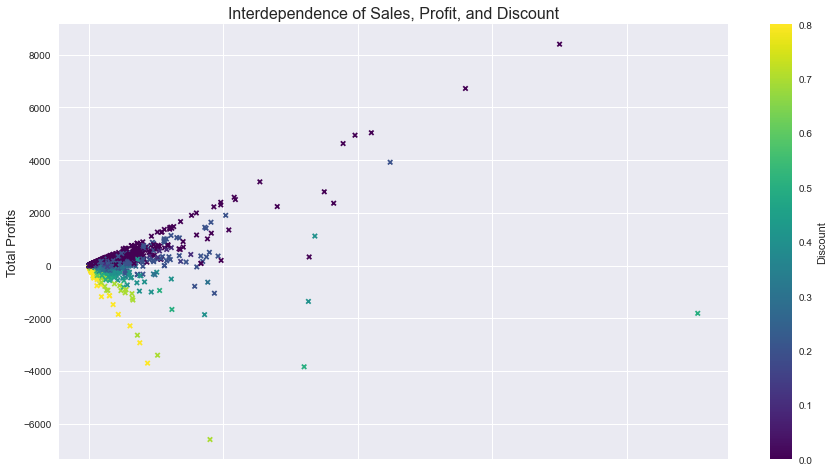

In [7]:
plt.style.use('seaborn')
sample.plot(kind = "scatter", figsize = (15,8), x = "Sales", y ="Profit" ,c ="Discount", s =20, marker ="x",colormap ="viridis")
plt.ylabel("Total Profits",fontsize =13)
plt.title("Interdependence of Sales, Profit, and Discount",fontsize =16)
plt.show()

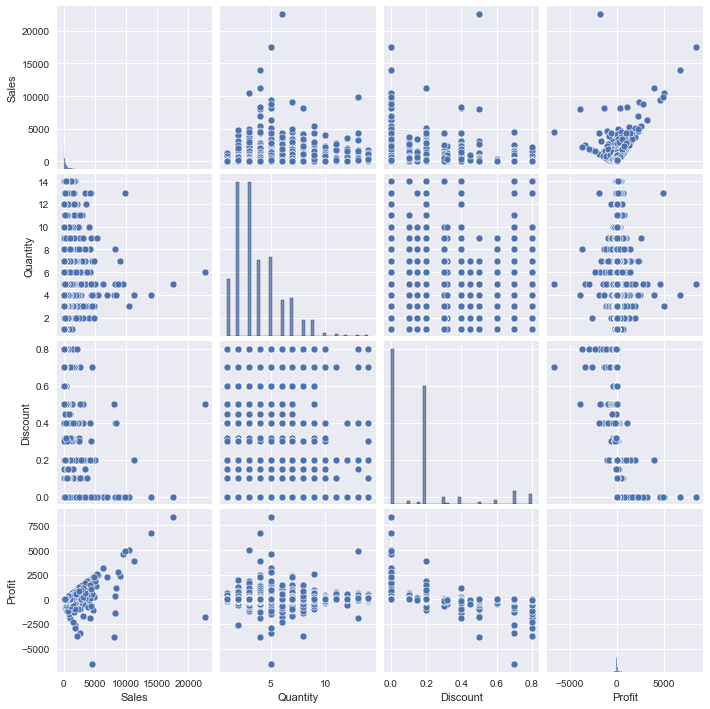

In [8]:
## Analysis of Relation

financial=sample.loc[:,['Sales','Quantity','Discount','Profit']]
sns.pairplot(financial)

In above we see that there is some relation between sales and profit and also there is some relation between Discount and Profit. Now To see what exact relation between those entities we plot the heat_map. so we get more clearity.

<AxesSubplot:>

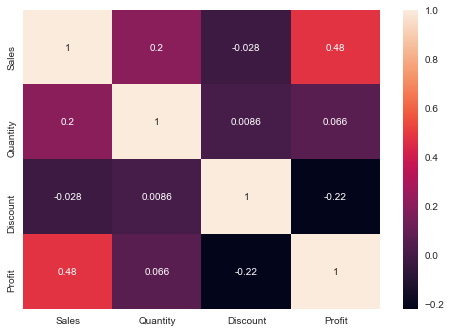

In [9]:
correlation=financial.corr()
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)

From Above map we infer that, 1)sales and profits are positively correlated 2)Discount and Profits are Negatively correlated.

Hence we consider these cases and proceed furthe.

# Case-1 When Discount is 0

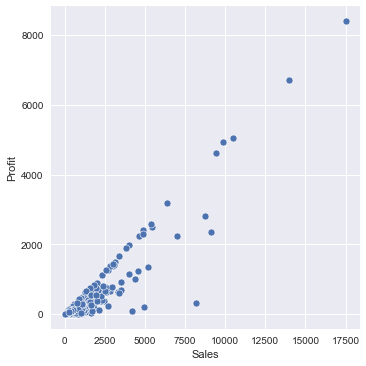

In [10]:

data=sample[sample['Discount']==0]
sns.relplot(x='Sales',y='Profit',data=data)

Hence we say that there positive relation between Profit and sales.when Discount is 0 Now we plot heat_map to get correlaton.

<AxesSubplot:>

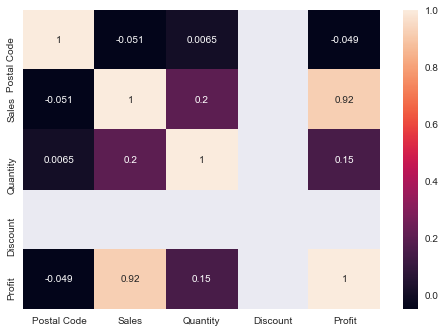

In [11]:
correlation=data.corr()
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)

Hence, we see that There is strong correlation between sales and Profit i.e 0.92.

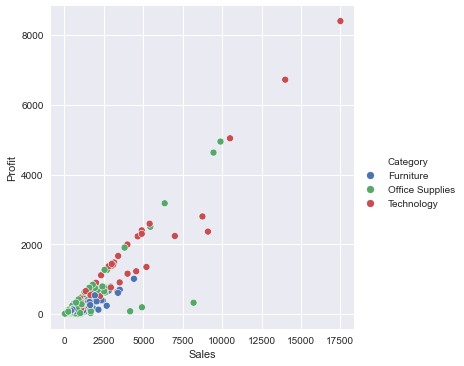

In [13]:
#Relation plot with respect category
sns.relplot(x='Sales',y='Profit',hue='Category',data=data)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales', ylabel='Profit'>

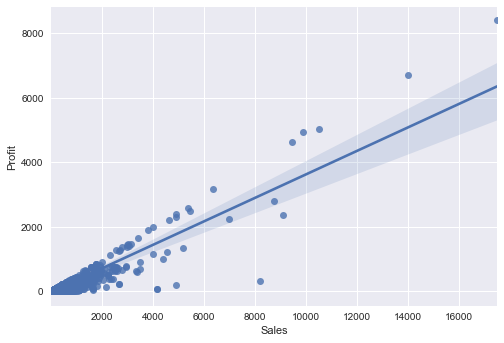

In [14]:
# Regression Plot 
sns.regplot(data['Sales'],data['Profit'])

<AxesSubplot:xlabel='Category', ylabel='Profit'>

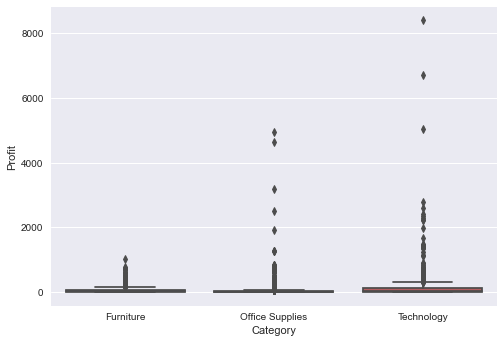

In [15]:
sns.boxplot(x='Category',y='Profit',data=data)

# Case-1 When Discount is not 0

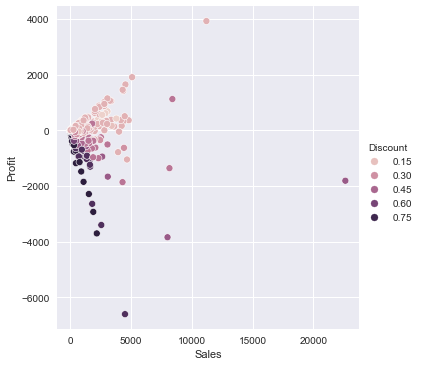

In [16]:
data1=sample[sample['Discount']!=0]
sns.relplot(x='Sales',y='Profit',hue='Discount',data=data1)

In above graph we see that as percentages of Discount increses the sales is also goes increses but profit goes decreases

Now we check how it can be effects on different sectors of businesses

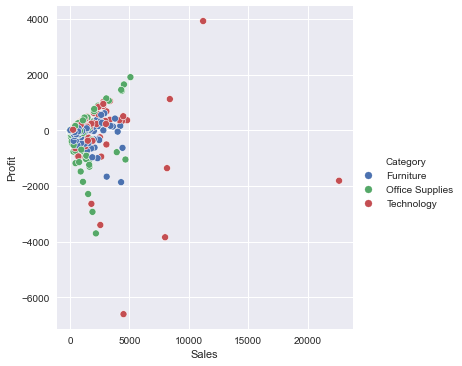

In [17]:
sns.relplot(x='Sales',y='Profit',hue='Category',data=data1)

<AxesSubplot:>

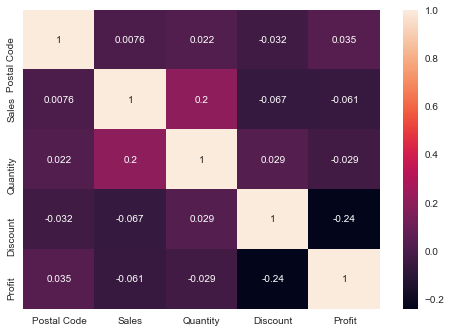

In [18]:
# Relationship Analysis
correlation=data1.corr()
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)

<AxesSubplot:xlabel='Sub-Category'>

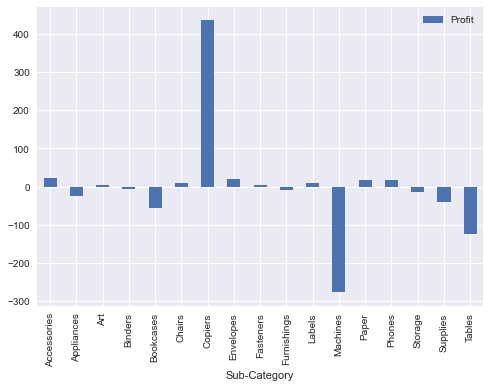

In [19]:
pivot=pd.pivot_table(data1,index='Sub-Category',values='Profit')
pivot.plot(kind='bar')

Here we see that copiers had highest Profit and Machines had highest loss

<AxesSubplot:xlabel='Sub-Category'>

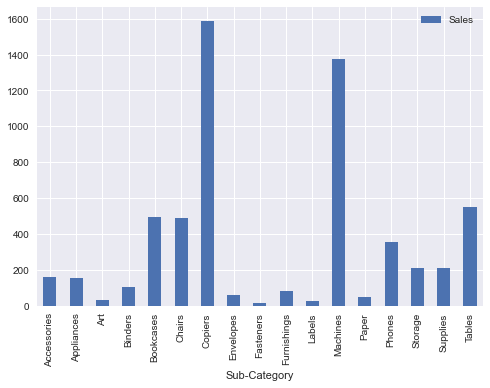

In [20]:

pivot=pd.pivot_table(data1,index='Sub-Category',values='Sales')
pivot.plot(kind='bar')

Here we see that copiers had highest sale and Machines had second highest sales

In above two graph we see that 'Machines' had second highest sale but due to large discount it is in loss and in second graph we see that sales in 'Fasteners','labels'and 'Art' category are so weak.so we have to concentrate on these sub-category businesses

# Discounts are triggering losses

Distrubution of Profits across diffrent regions

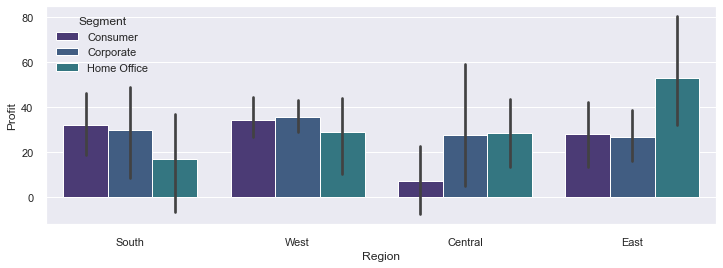

In [22]:
plt.figure(figsize = (12,4))
sns.set(font_scale=1, palette= "viridis")
sns.barplot(data = sample , x = "Region",y = "Profit" ,hue = "Segment")
plt.show()

Overall each Segment is profitable.

Profit distribution by Region

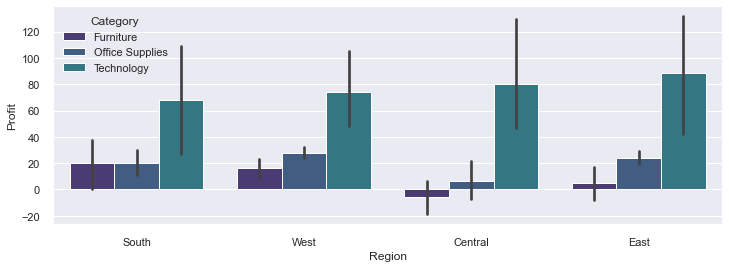

In [24]:
plt.figure(figsize = (12,4))
sns.set(font_scale=1, palette= "viridis")
sns.barplot(data = sample , x = "Region",y = "Profit" ,hue = "Category")
plt.show()

"Furniture" Category is the only loss making sector that to only in Central Region

# nvestigating losses in Furniture category in the Central region

In [25]:
# Grouping Data by Region and only slicing Data for Central Region from whole Data Set
gb_Central = list(sample.groupby("Region"))[0][1]


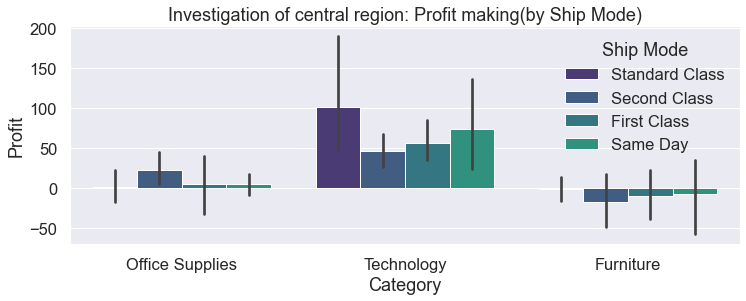

In [26]:
# Investing Further in cenral Region 
plt.figure(figsize = (12,4))
sns.set(font_scale=1.5, palette= "viridis")
sns.barplot(data = gb_Central, x = "Category",y = "Profit" ,hue = "Ship Mode")
plt.title("Investigation of central region: Profit making(by Ship Mode)")
plt.show()

Losses are inccured in Furniture Cateory irrespective to ship mode in Central Region

In [28]:
# Slicing Furniture Data from whole data set
gb_Category_Furniture =list(list(sample.groupby("Region"))[0][1].groupby("Category"))[0][1]

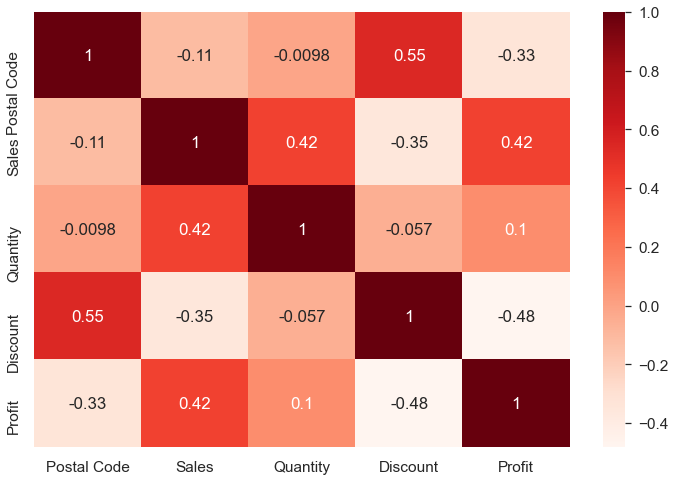

In [29]:

# Correlation matrix Heat Map to identify key factors influening profits
plt.figure(figsize = (12,8))
sns.set(font_scale=1.4)
sns.heatmap(gb_Category_Furniture.corr() , annot = True, cmap ="Reds")
plt.show()

There is unusually high positive correlation between Postal Code and Discount
Also, Their is negative correlation between Discount and Sales eventhough dicounts are entered as positive values... i.e. they are not helping in improving sales of "Furniture" category of the company

# Investigating individual performance by states in the central region

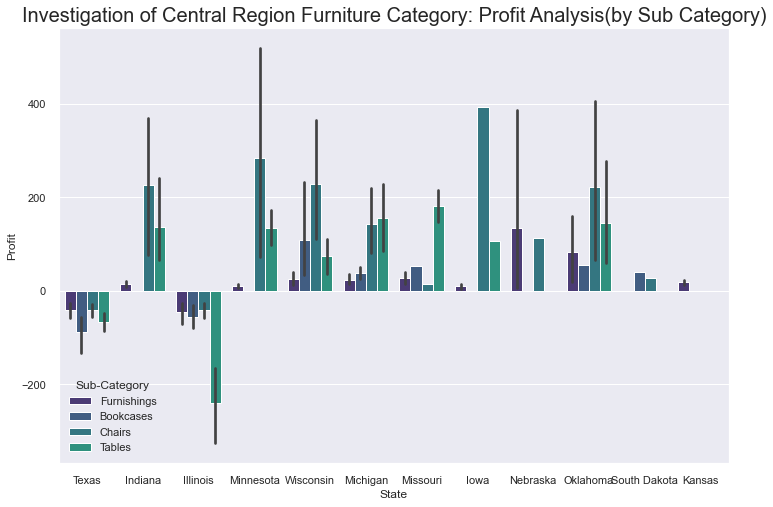

In [30]:

plt.figure(figsize = (12,8))
sns.set(font_scale=1, palette= "viridis")
sns.barplot(data = gb_Category_Furniture , x = "State",y = "Profit" ,hue = "Sub-Category")
plt.title("Investigation of Central Region Furniture Category: Profit Analysis(by Sub Category)", fontsize = 20)
plt.show()

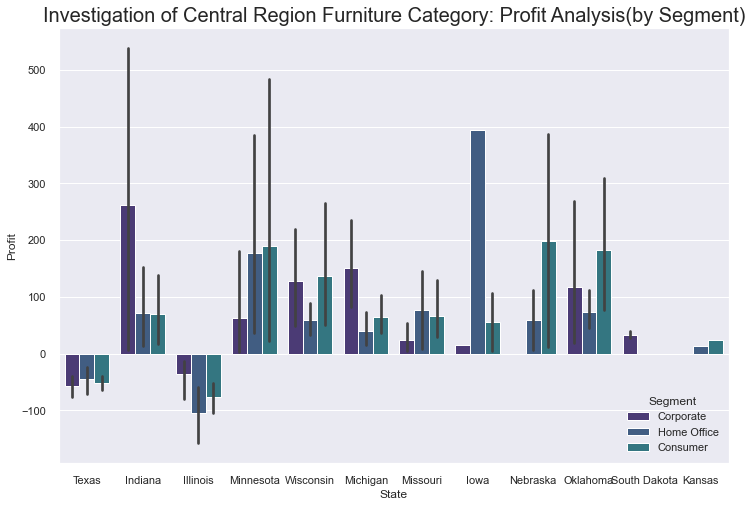

In [31]:
plt.figure(figsize = (12,8))
sns.set(font_scale=1, palette= "viridis")
sns.barplot(data = gb_Category_Furniture , x = "State",y = "Profit" ,hue = "Segment")
plt.title("Investigation of Central Region Furniture Category: Profit Analysis(by Segment)", fontsize = 20)
plt.show()

Texas and Illiois are only two states contributing to all the losses in Furniture category in the Central Region
Losses in Tables Sub Category is significanlty high.

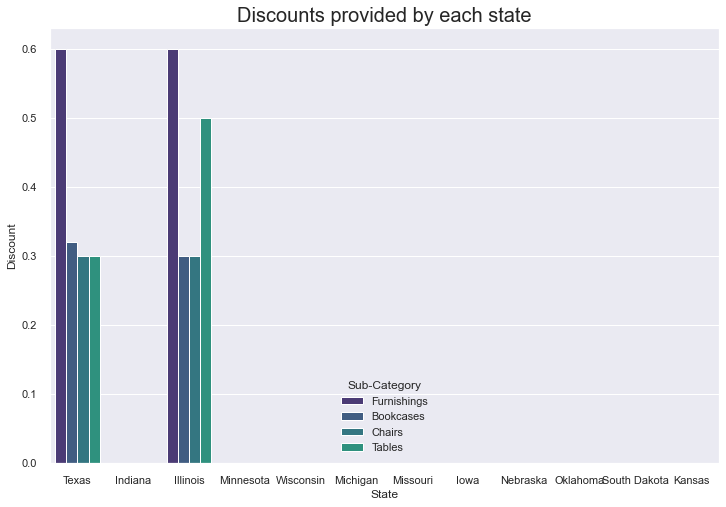

In [32]:
plt.figure(figsize = (12,8))
sns.set(font_scale=1, palette= "viridis")
sns.barplot(data = gb_Category_Furniture , x = "State",y = "Discount" ,hue = "Sub-Category")
plt.title("Discounts provided by each state", fontsize = 20)
plt.show()

Texas and Illinois are only states providing discounts in the whole central region this justifies high positive correlation between postal codes and discounts.
Also, these discounts are very high!
1. 60% on Furnishings
2. 30% on Bookcases and Chairs
3. 50% disount on Tables in Illinois and 30% in Texas
4. Are these discounts driving sales up?.... NO!

<Figure size 864x576 with 0 Axes>

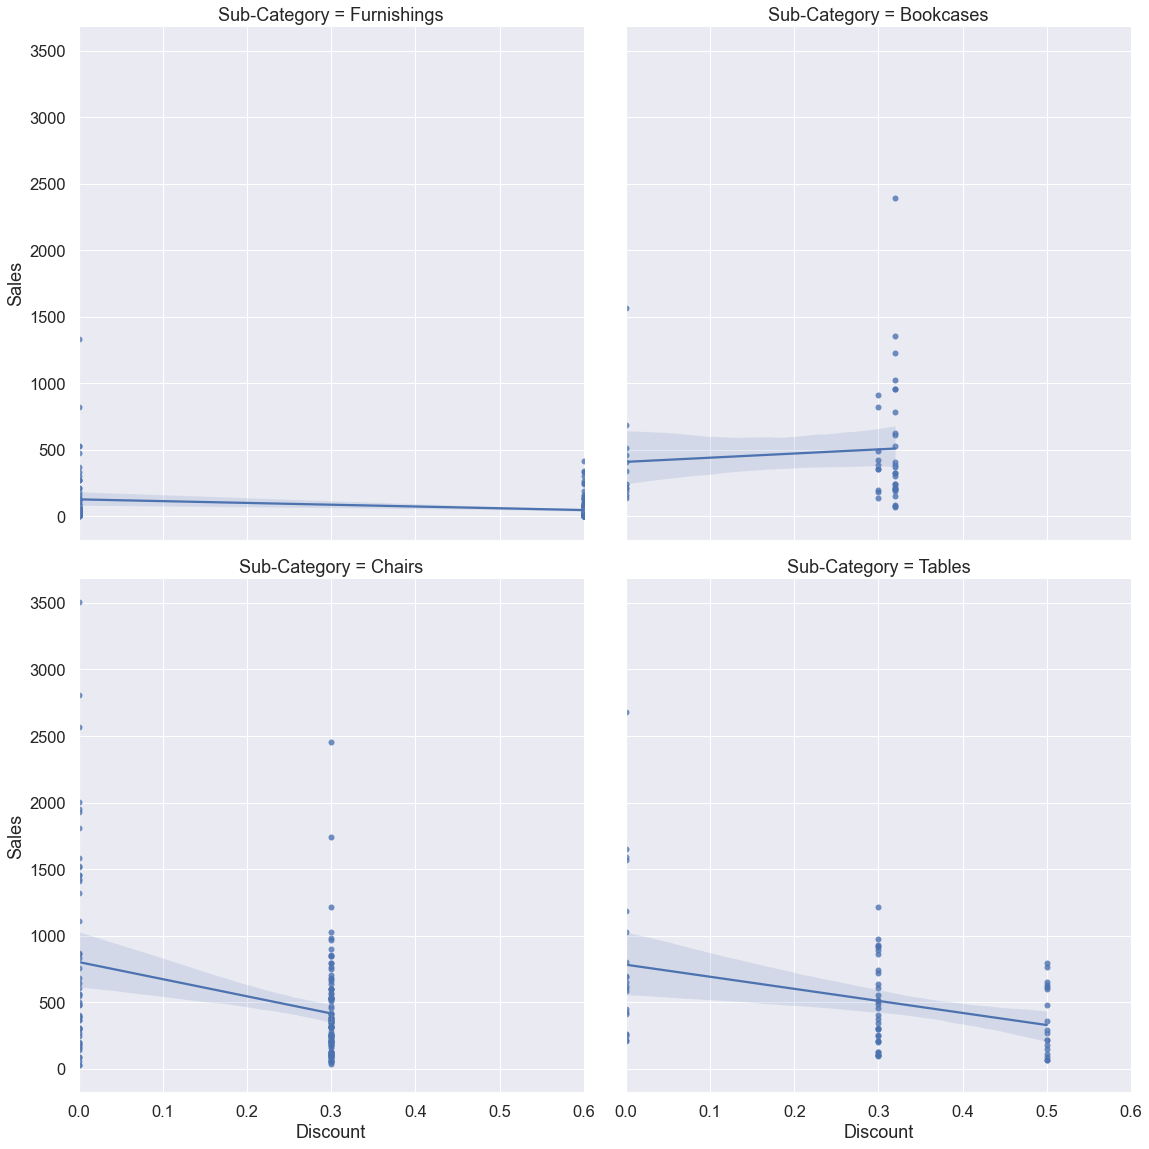

In [33]:
plt.figure(figsize = (12,8))
sns.set(font_scale=1.5)
sns.lmplot(data = gb_Category_Furniture , x = "Discount", y ="Sales", aspect = 1, height = 8, col ="Sub-Category", col_wrap= 2)
plt.show()

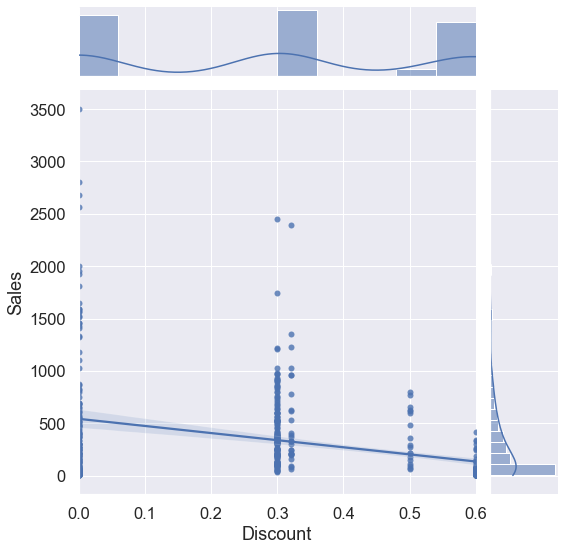

In [34]:

# Jiont plot for studying overall relationship between Sales and Discounts
sns.set(font_scale=1.5)
sns.jointplot(data = gb_Category_Furniture , x = "Discount", y ="Sales", height = 8, kind = "reg")
plt.show()

Actually Sales tend to do down when discounts go up in 3 out of 4 "Subcategories" and also in overall Furniture Category Sales in the Central Region.

<AxesSubplot:xlabel='Category', ylabel='Profit'>

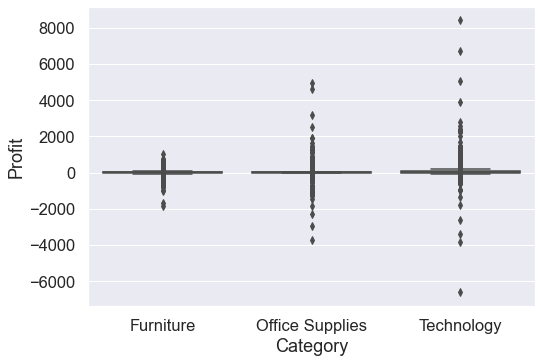

In [36]:
# box plot
sns.boxplot(x='Category',y='Profit',data=sample)

we see that variation in Technology sector is more as compared to other two sector

<AxesSubplot:xlabel='Category'>

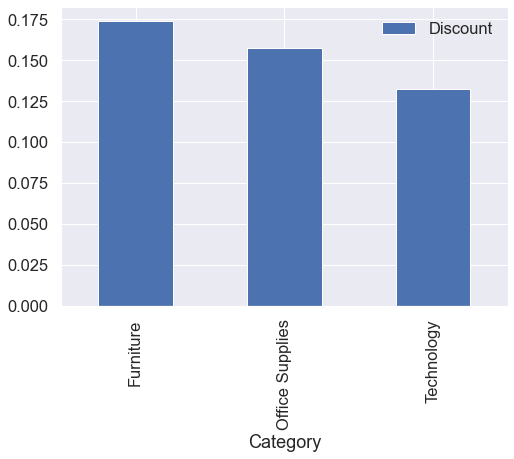

In [38]:
pivot=pd.pivot_table(sample,index='Category',values='Discount')
pivot.plot(kind='bar')

<AxesSubplot:xlabel='Category'>

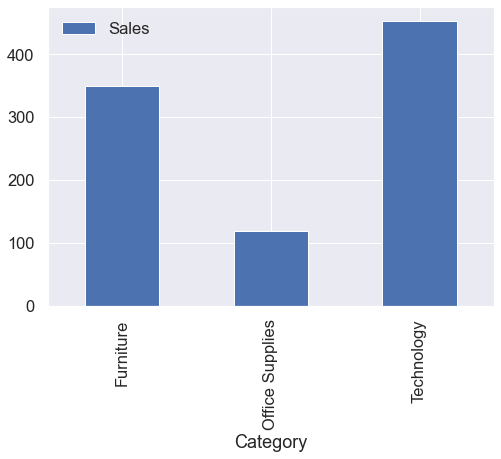

In [39]:
pivot=pd.pivot_table(sample,index='Category',values='Sales')
pivot.plot(kind='bar')

<AxesSubplot:xlabel='Category'>

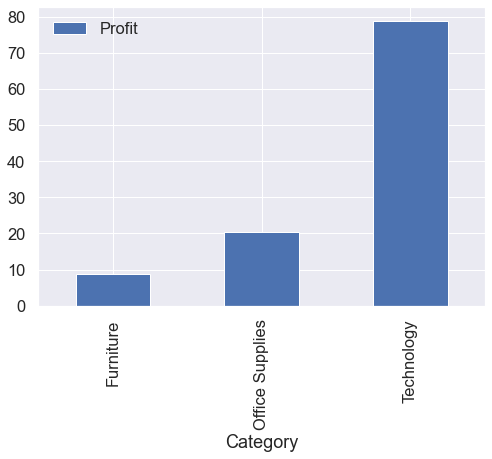

In [40]:
pivot=pd.pivot_table(sample,index='Category',values='Profit')
pivot.plot(kind='bar')

From above three plot we say that
1) More Discount is given in Furniture category and less Discount is given in Technology category businesses.

2) Sales of Technology category businesses are more as compared to Furniture category.

3) Profit of Technology category businesses are more as compared to Furniture category.


Conclusion
From All these analysis we finally conclude that,
1) If we give more Discount on products our sales goes increses but Profit get down.
2) In Technology category business we get more Profit as compared to other two business.These is because of we given less Discount.
3) Here we also focus on our Office Supplies category business because sales of these category is less as compared to other two.
4) Also Sales in 'Fasteners','labels'and 'Art' category are so weak.so we have to concentrate on these sub-category businesses.
5) We have to concentrate on the Sales of 'West Virginia' State and 'San Luis Obispo' and 'Woodland' City.
6) To rise the profits , we first need to sell consumer segment products more .
7) For enhancing the profits , we need to sell more to the states which are liking our products¶ like NEWYORK and CALIFORNIA .
Hence To get good profit in any business you have to focus on increasing sales but not giving more discount